<img src="https://www.janestreet.com/puzzles/pent-up-frustration-2.png" alt="drawing" width="300"/>

You have seventeen identical unit regular pentagonal tiles on a tabletop. If you arrange them all into a single polyform (so each pentagon placed after the first shares a side with an already-placed pentagon, but no two pentagons overlap other than along their boundaries), what is the smallest nonzero distance you can create between two of the pentagons? Here, the distance between pentagon A and pentagon B is the infimum of the set of distances between any point of A and any point of B. Give your answer rounded to seven decimal places.

[As an example, if you only had four pentagons the answer would be ~0.5877853, from the arrangement pictured above.]

In [345]:
from sympy import Polygon, RegularPolygon, pi, Point2D
import sympy

class Pent:
    def __init__(self, center, angle=0):
        self.base_angle = pi/10
        self.angle = angle
        self.center = center

        self.polygon = RegularPolygon(center, 1, 5, rot=self.base_angle)
        self.set_angle(angle)

        self.label = None
        self.child = None
        self.parent = None
        self.parent_face = None

    def attach(self, face: int):
        assert face <= 4 , 'face error'

        cx, cy = self.polygon.centroid

        ir = sympy.cos(pi/5)

        parent_angle = self.polygon.rotation - pi/10
        base_angle = -pi
        face_angle = face * (2*pi)/5
        total_angle = parent_angle + face_angle + base_angle

        nx = 2*ir*sympy.sin(parent_angle + face_angle) + cx
        ny = -2*ir*sympy.cos(parent_angle + face_angle) + cy
        
        self.child = type(self)(Point2D(nx, ny), angle=total_angle)
        self.child.parent = self
        self.child.parent_face = face

        return self.child
    
    def set_angle(self, angle):
        self.polygon.spin((angle+self.base_angle) - self.polygon.rotation)

    def is_overlap(self, polygons: list):
        overlapping = False

        for p in polygons:
            dist = self.polygon.centroid.distance(p.polygon.centroid)
            if dist < 1.618:
                overlapping = True
                break
        
        return overlapping

In [346]:
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import random

def plot_pentagon(pent: Pent, ax: Axes, color=None):
    if color is None:
        color = random.choice(['b', 'g', 'r', 'c', 'm', 'y'])
    x, y = list(zip(*[v.evalf().coordinates for v in pent.polygon.vertices]))

    ax.fill(x,y, color)

    apex = pent.polygon.vertices[1].evalf().coordinates
    ax.plot(apex[0], apex[1], color=color, marker='o', linestyle='dashed',
     linewidth=2, markersize=12)

    if pent.label:
        ax.text(*pent.polygon.centroid, pent.label, va='center', ha='center')

def plot_pentagons(pentl: list[Pent], ax: Axes):
    for pent in pentl:
        plot_pentagon(pent, ax)

In [459]:
import copy
import time

def dfs(prev_chain, min_dist, best_chain, tally):
    print(f'\r\33[2KTally: \t{tally[0]}\t{tally[1]}\t{tally[2]}\t{min_dist[0]}', end="")

    ## total tally
    tally[0]+=1

    ## if 5000 trials without finding new minimum
    # if tally[2] > 5000:
    #     return

    curr_chain = copy.deepcopy(prev_chain)
    end_node = curr_chain[-1]

    if(len(curr_chain) == 17):

        tally[1]+=1
        tally[2]+=1
        dist = end_node.polygon.centroid.distance(curr_chain[0].polygon.centroid).evalf()

        if dist > 1.6181 and dist<min_dist[0]:
            tally[2]*=0
            min_dist[0] = dist
            best_chain[0] = curr_chain
        return

    faces = [1, 2, 3, 4]
    if end_node.parent_face in (1,4):
        faces.remove(end_node.parent_face)

    for face in faces:
        pot_child = end_node.attach(face)
        # if not pot_child.is_overlap(curr_chain):
        dfs([*curr_chain, pot_child], min_dist, best_chain, tally)

In [ ]:
t0 = time.time()

parent = Pent((0,0))
child0 = parent.attach(2)
chain = [parent, child0]

best_chain = [[]]
min_dist = [5000]
tally = [0,0,0]

dfs(chain, min_dist, best_chain, tally)

t1 = time.time()

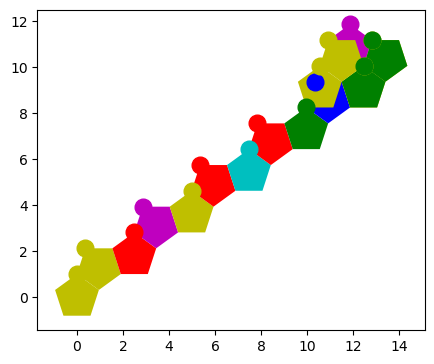

In [463]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')

plot_pentagons(best_chain[0], ax)